In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [277]:
path = '/home/octo/Desktop/PyCon2016/ML_Fea.ipynb'
#path = '/home/octo/Desktop/QTPY/data/sec/'


In [281]:
import TA# self made python file at PyCON16 folder for TA
#https://mrjbq7.github.io/ta-lib/func.html
import talib

In [3]:
data1='QQQ.csv'
data2='SPY.csv'

In [13]:
SPY=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
QQQ=pd.read_csv(path + 'QQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [14]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245538 entries, 2014-01-02 09:31:00 to 2016-06-30 16:01:00
Data columns (total 6 columns):
high            245538 non-null float64
low             245538 non-null float64
open            245538 non-null float64
close           245538 non-null float64
total_volume    245538 non-null int64
volume          245538 non-null int64
dtypes: float64(4), int64(2)
memory usage: 13.1 MB


1. Jump up or down of 0.004 with higher volume is 12% each. So trading at these bars only.                                                                                           

2. Change 12 bars of 0.07 with/without volume lead to trend and reversal

3. cumsum return reversal and trend


In [647]:
SPY['ROC_4'] = talib.ROC(np.asarray(SPY['close']), timeperiod=4)# good distribution of return -1 to +1 
SPY['ROC_19'] = talib.ROC(np.asarray(SPY['close']), timeperiod=19)## good distribution of return -1 to +1 
SPY['ROC'] = np.where(SPY['ROC_19']-SPY['ROC_4']>0.1,1,np.where(SPY['ROC_19']-SPY['ROC_4']<-0.1,-1,0))

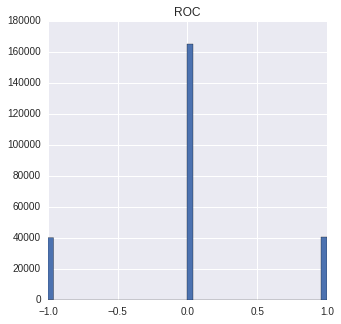

In [648]:
pd.DataFrame.hist(SPY[['ROC']],bins=50,figsize = [5,5]);

In [655]:
SPY['RSI'] = np.where(talib.RSI(np.asarray(SPY['close']), timeperiod=15)>61,1,np.where(talib.RSI(np.asarray(SPY['close']), timeperiod=15)<40,-1,0))

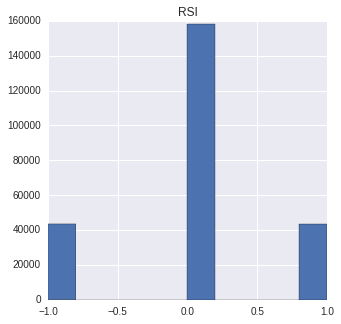

In [656]:
pd.DataFrame.hist(SPY[['RSI']],bins=10,figsize = [5,5]);

In [661]:
SPY['ADX']=np.where(talib.ADX(np.asarray(SPY['close']),np.asarray(SPY['low']),np.asarray(SPY['high']),timeperiod=15)>32,1,0)

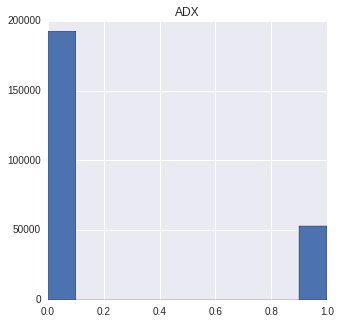

In [662]:
pd.DataFrame.hist(SPY[['ADX']],bins=10,figsize = [5,5]);

In [136]:
#pd.DataFrame.hist(SPY[['Change']],bins=5,figsize = [5,5]);

In [135]:
#plt.plot(SPY['Change'])

In [139]:
#SPY['jUjD']=np.where(np.logical_and(SPY['jump'].shift(1)==1,SPY['Change']>0),1,np.where(np.logical_and(SPY['jump'].shift(1)==-1,SPY['Change']<0),-1,0))

In [140]:
#SPY.info()

In [145]:
#plt.plot(SPY['Change'].cumsum())

In [144]:
#pd.DataFrame.hist(SPY[['jUjD']],bins=5,figsize = [5,5]);

In [147]:
#SPY['volume_mean'].plot(figsize = [15,15])

In [155]:
#SPY['jUjD']=np.where(np.logical_and(SPY['jV'].shift(1)==1,SPY['Change']>0),1,np.where(np.logical_and(SPY['jV'].shift(1)==-1,SPY['Change']<0),-1,0))

In [154]:
#pd.DataFrame.hist(SPY[['jUjD']],bins=5,figsize = [5,5]);

So from avove we can conclude after jump neither reversal nor trend can be ovserved!!

After 12 bars trend at next 50 or reversal??

##### Total change after 5 min or 50 bars [O-Ref(C,-50)]

In [667]:
SPY['return']= np.where(SPY['open']>SPY['close'].shift(1),1,np.where(SPY['open']<SPY['close'].shift(1),-1,0))
SPY['volume_ch']=SPY['volume']/SPY['volume'].shift(1)
SPY['4Ch'] = SPY['open']-SPY['close'].shift(4)
SPY['4VCh'] = SPY['volume']/SPY['volume'].shift(4)
SPY['19Ch'] = SPY['open']-SPY['close'].shift(19)
SPY['19VCh'] = SPY['volume']/SPY['volume'].shift(19)

In [666]:
##volume above 1 to get trend 
SPY['4J']=np.where(SPY['4Ch']>0.05,1,np.where(SPY['4Ch']<-0.05,-1,0))
SPY['4jHV']=np.where(np.logical_and(SPY['4J']==1,SPY['4VCh']>1.2),1,np.where(np.logical_and(SPY['4J']==-1,SPY['4VCh']>1.2),-1,0))

In [672]:
##volume below 1 to get trend 
SPY['4J']=np.where(SPY['4Ch']>0.07,1,np.where(SPY['4Ch']<-0.07,-1,0))
SPY['4jLV']=np.where(np.logical_and(SPY['4J']==1,SPY['4VCh']<0.70),1,np.where(np.logical_and(SPY['4J']==-1,SPY['4VCh']<0.70),-1,0))

In [670]:
##volume above 1 show tr possible
SPY['19J']=np.where(SPY['19Ch']>0.2,1,np.where(SPY['19Ch']<-0.2,-1,0))

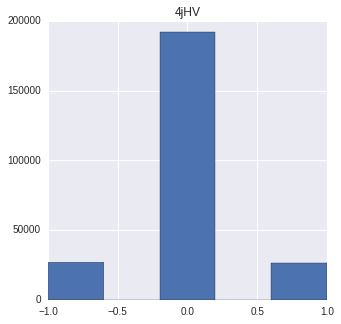

In [665]:
pd.DataFrame.hist(SPY[['4jHV']],bins=5,figsize = [5,5]);

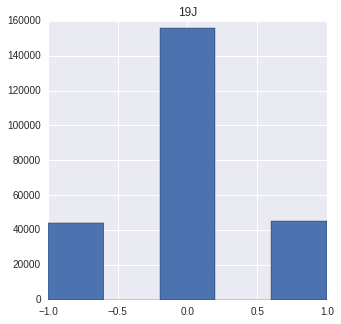

In [671]:
pd.DataFrame.hist(SPY[['19J']],bins=5,figsize = [5,5]);

ROC,ADX with change 0.001% or 0.2, these have 16% frequency each

In [677]:
#after 4 bars
SPY['4jHV_adx']=np.where(np.logical_and(SPY['4jHV']==1,SPY['ADX']==1),1,np.where(np.logical_and(SPY['4jHV']==-1,SPY['ADX']==1),-1,0))

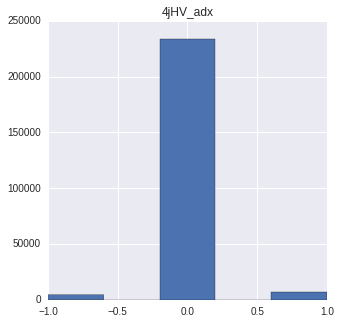

In [678]:
pd.DataFrame.hist(SPY[['4jHV_adx']],bins=5,figsize = [5,5]);

In [681]:
#after 4 bars
SPY['4jHV_roc4']=np.where(np.logical_and(SPY['4jHV']==1,SPY['ROC_4']==1),1,np.where(np.logical_and(SPY['4jHV']==-1,SPY['ROC_4']==-1),-1,0))

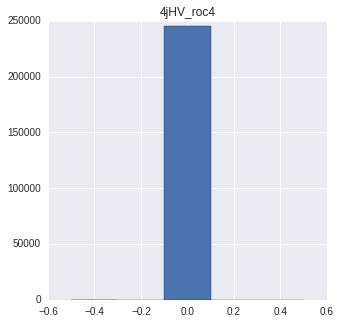

In [682]:
pd.DataFrame.hist(SPY[['4jHV_roc4']],bins=5,figsize = [5,5]);

In [685]:
#after 4 bars
SPY['4jHV_roc']=np.where(np.logical_and(SPY['4jHV'].shift(15)==1,SPY['ROC']==1),1,np.where(np.logical_and(SPY['4jHV'].shift(15)==-1,SPY['ROC']==-1),-1,0))

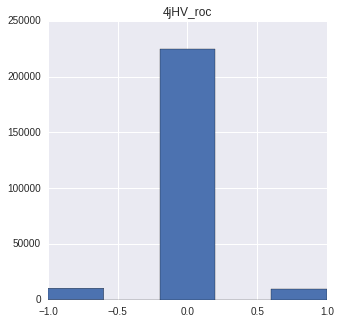

In [686]:
pd.DataFrame.hist(SPY[['4jHV_roc']],bins=5,figsize = [5,5]);

In [687]:
#after 4 bars
SPY['19J_roc']=np.where(np.logical_and(SPY['19J']==1,SPY['ROC']==1),1,np.where(np.logical_and(SPY['19J']==-1,SPY['ROC']==-1),-1,0))

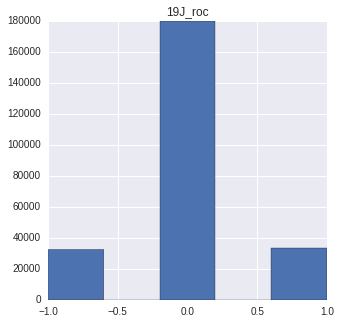

In [688]:
pd.DataFrame.hist(SPY[['19J_roc']],bins=5,figsize = [5,5]);

In [468]:
SPY['trend']=np.where(np.logical_and(SPY['12jHV']==1,SPY['ADX']==1),1,np.where(np.logical_and(SPY['12jHV']==-1,SPY['momentum']==-1),-1,0))

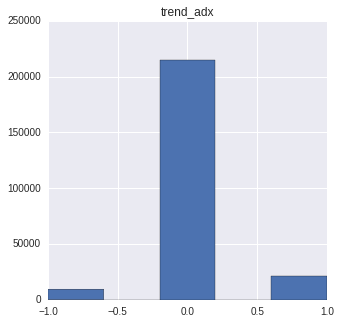

In [469]:
pd.DataFrame.hist(SPY[['trend_adx']],bins=5,figsize = [5,5]);

In [507]:
##volume above 1 show tr possible
SPY['120J']=np.where(SPY['120Ch']>0.35,1,np.where(SPY['120Ch']<-0.3,-1,0))

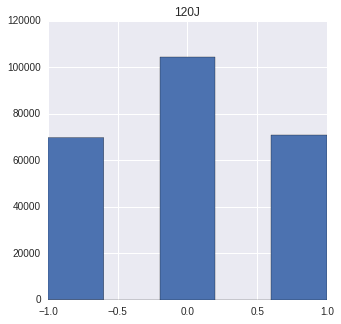

In [508]:
pd.DataFrame.hist(SPY[['120J']],bins=5,figsize = [5,5]);

In [509]:
SPY['1250jT']=np.where(np.logical_and(SPY['trend_cmo'].shift(38)==1,SPY['120J']==1),1,np.where(np.logical_and(SPY['trend_cmo'].shift(38)==-1,SPY['120J']==1),-1,0))

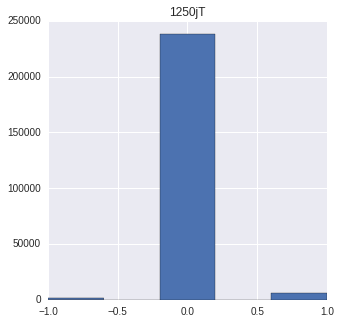

In [510]:
pd.DataFrame.hist(SPY[['1250jT']],bins=5,figsize = [5,5]);

In [494]:
SPY['1250jT']=np.where(np.logical_and(SPY['trend_adx'].shift(38)==1,SPY['50J']==1),1,np.where(np.logical_and(SPY['trend_adx'].shift(38)==-1,SPY['50J']==1),-1,0))

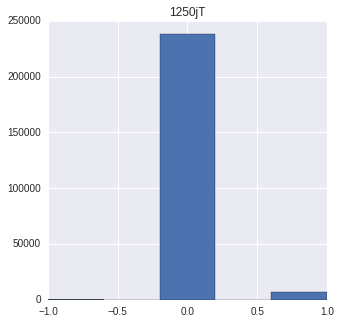

In [495]:
pd.DataFrame.hist(SPY[['1250jT']],bins=5,figsize = [5,5]);